In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,7)
sns.set()

In [16]:
data = pd.read_csv('train_cleaned.csv')
# target = data.Purchase
# data = data.drop('Purchase', axis=1)

# data = pd.concat([data, target], axis=1)
# data.to_csv('train_cleaned.csv', index=False)

In [3]:
# imputer = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=1)
# imputer.fit_transform(data)
# data.Product_Category_2 = imputer.transform(data.Product_Category_2)[0]
# data.Product_Category_3 = imputer.transform(data.Product_Category_3)[0]
# 7176354
# 71.5592233844

In [4]:
# data.isnull().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
pid_4_f_lett_0                     0
pid_4_f_lett_1                     0
pid_4_f_lett_2                     0
pid_4_f_lett_3                     0
pid_4_f_lett_4                     0
pid_2_l_lett                       0
pid                                0
dtype: int64

In [5]:
# data.iloc[:,1:].head(20)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,pid_4_f_lett_0,pid_4_f_lett_1,pid_4_f_lett_2,pid_4_f_lett_3,pid_4_f_lett_4,pid_2_l_lett,pid
0,0,0,10,0,2,0,3,NaN,NaN,1,0,0,0,0,42,690
1,0,0,10,0,2,0,1,6,14,0,0,1,0,0,42,489
2,0,0,10,0,2,0,12,NaN,NaN,1,0,0,0,0,42,878
3,0,0,10,0,2,0,12,14,NaN,1,0,0,0,0,42,854
4,1,6,16,2,4,0,8,NaN,NaN,0,0,1,0,0,42,854
5,1,2,15,0,3,0,1,2,NaN,0,1,0,0,0,42,935
6,1,4,7,1,2,1,1,8,17,0,1,0,0,0,42,849
7,1,4,7,1,2,1,1,15,NaN,0,0,0,1,0,42,461
8,1,4,7,1,2,1,1,16,NaN,0,0,0,0,1,42,72
9,1,2,20,0,1,1,8,NaN,NaN,0,0,1,0,0,42,749


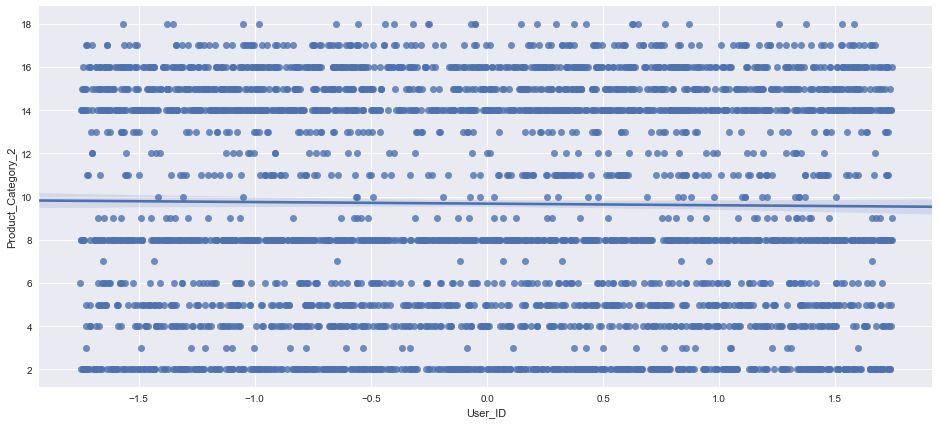

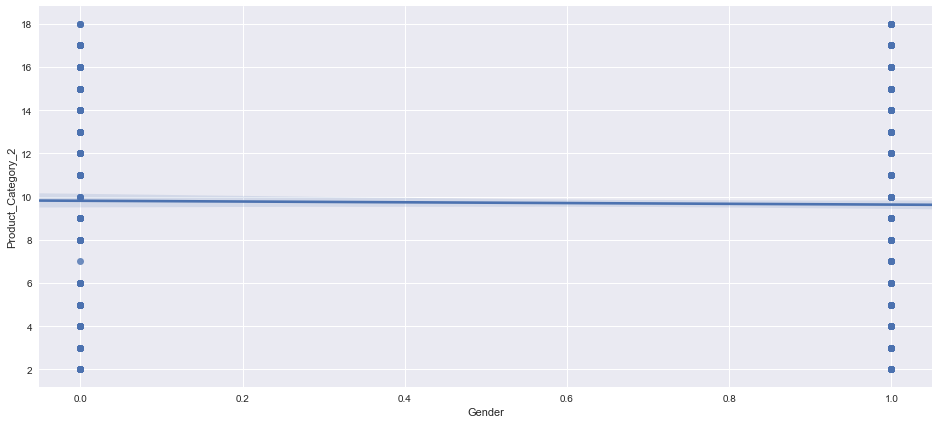

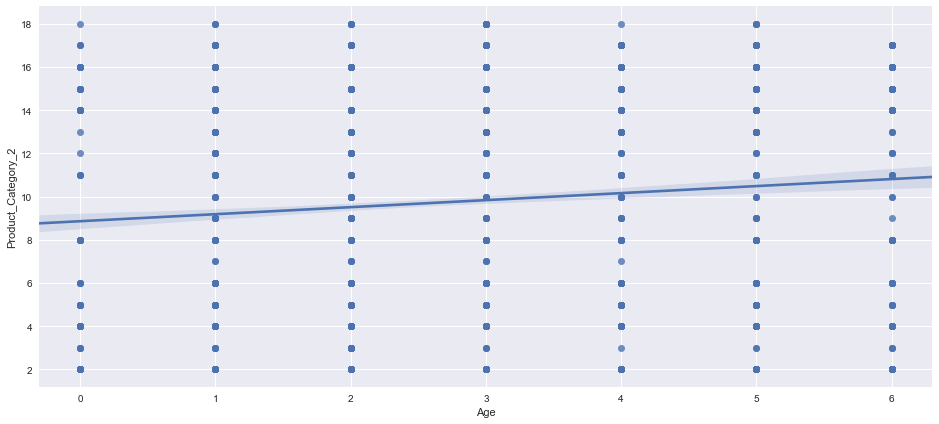

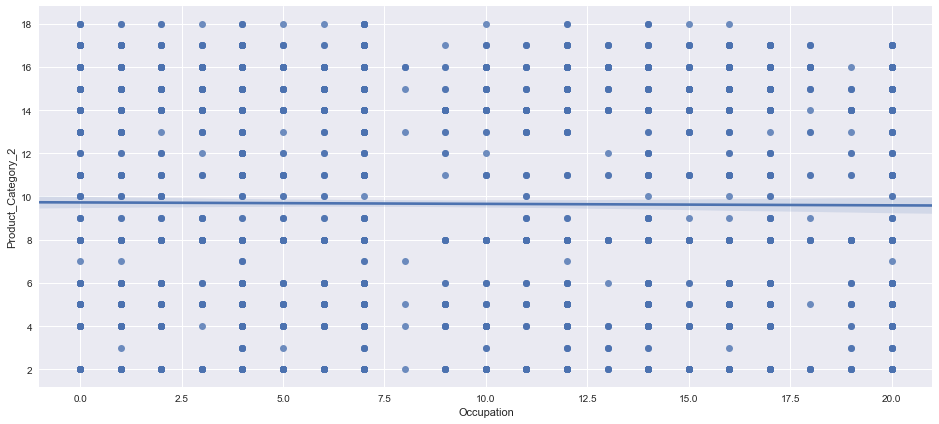

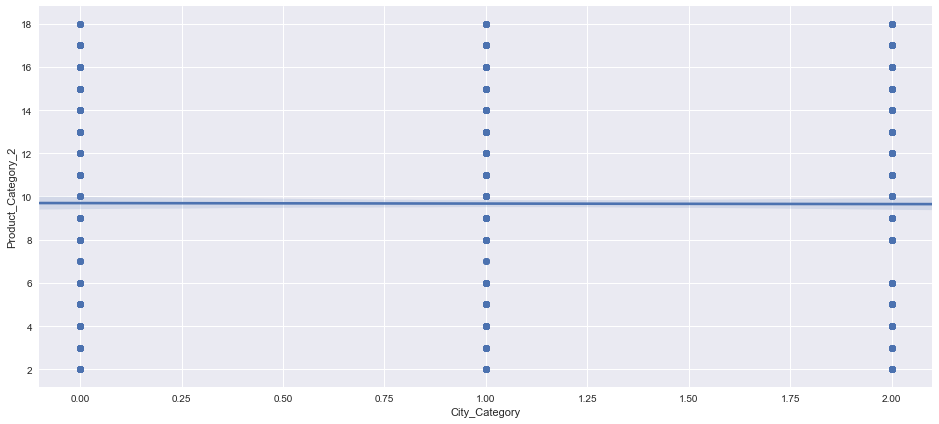

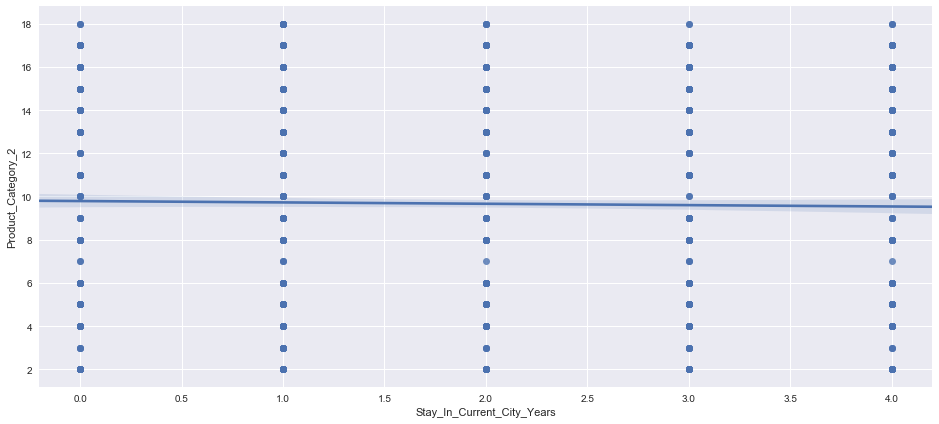

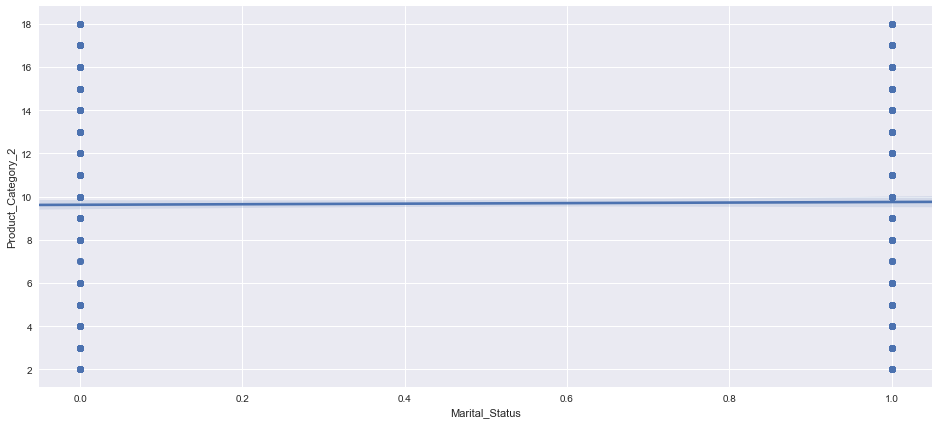

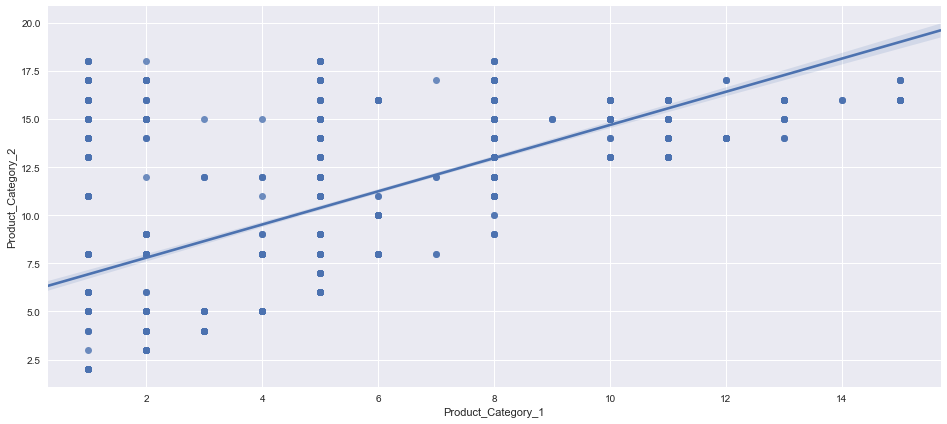

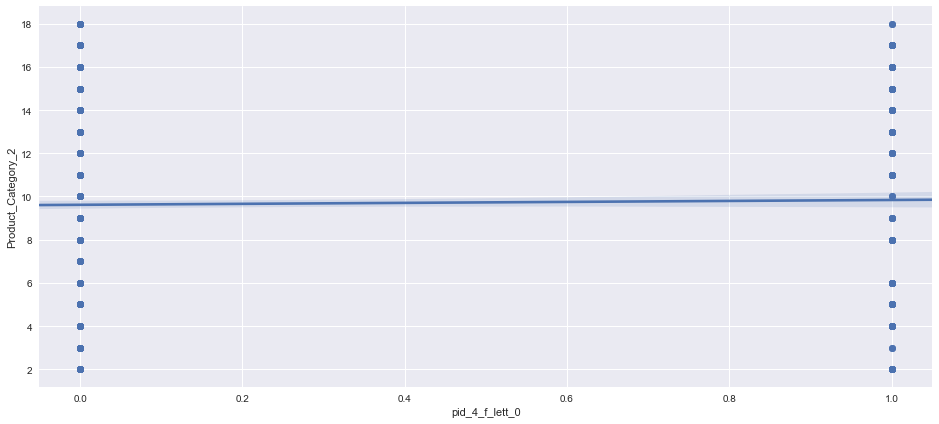

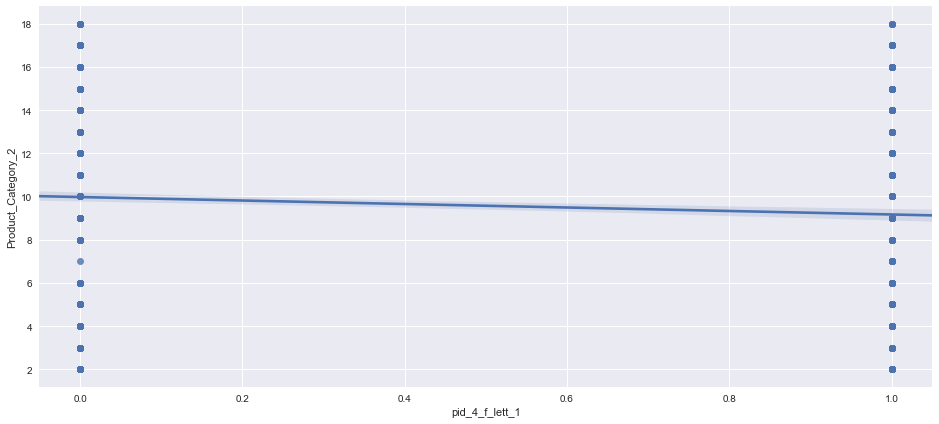

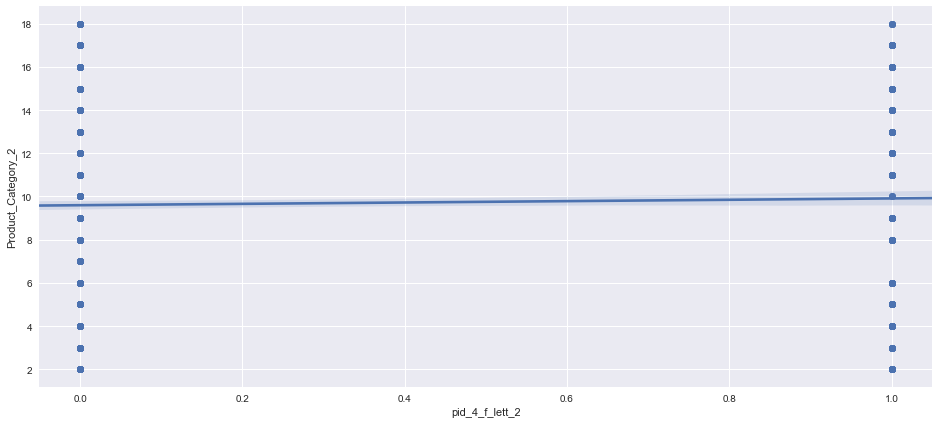

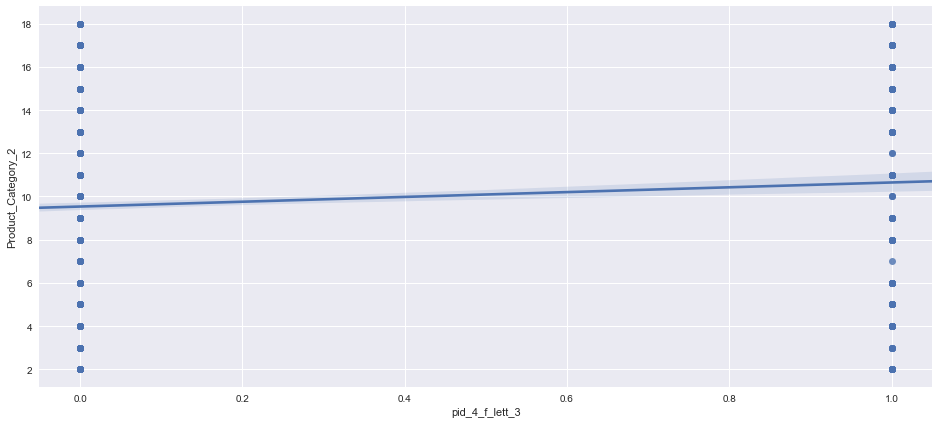

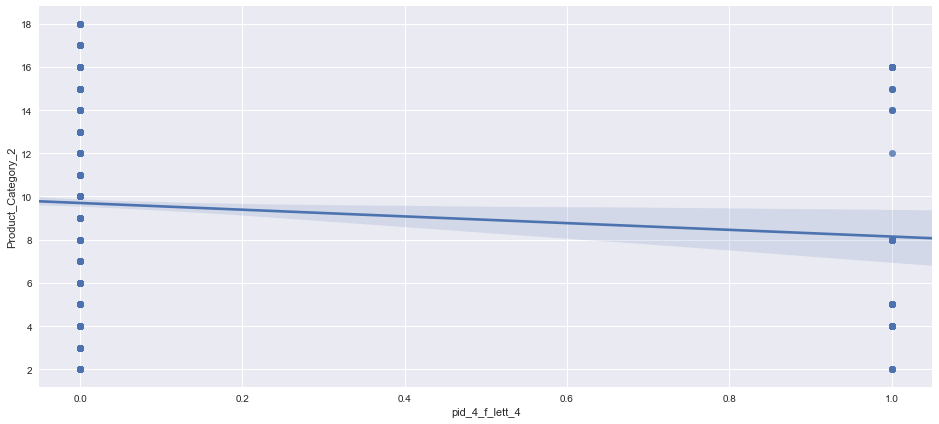

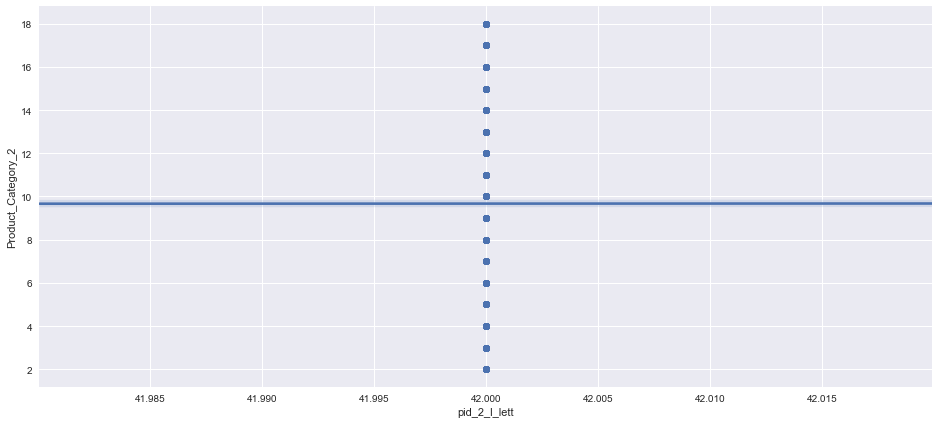

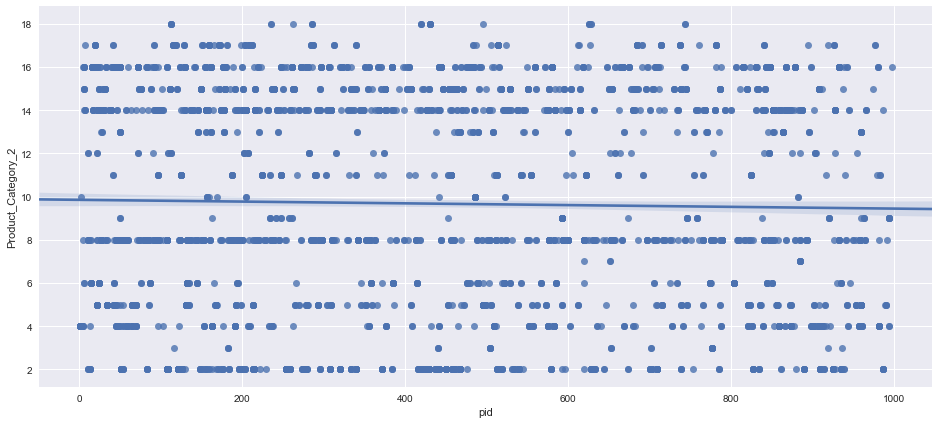

In [6]:
not_nan = data[~data.Product_Category_2.isnull()].Product_Category_2
nan = data[data.isnull()].Product_Category_2
# sns.regplot(data.Age.iloc[not_nan.index].iloc[::100], not_nan.iloc[::100])
# plt.show()
# ===> Age++


cols =['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'pid_4_f_lett_0',
       'pid_4_f_lett_1', 'pid_4_f_lett_2', 'pid_4_f_lett_3', 'pid_4_f_lett_4',
       'pid_2_l_lett', 'pid']
for col in cols:
    fig = plt.figure()
    sns.regplot(data[col].iloc[not_nan.index].iloc[::100], not_nan.iloc[::100])
    
plt.show()

In [49]:
best_cols = ['Age',
            'Stay_In_Current_City_Years','Product_Category_1',
            'pid_4_f_lett_1', 'pid_4_f_lett_3', 'pid_4_f_lett_4',
            'pid']

# best_cols = ['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
#        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
#        'pid_4_f_lett_0',
#        'pid_4_f_lett_1', 'pid_4_f_lett_2', 'pid_4_f_lett_3', 'pid_4_f_lett_4',
#        'pid_2_l_lett', 'pid']

In [51]:
data_cat_2 = data.loc[:, best_cols][~ data.Product_Category_2.isnull()]
data_cat_2_nan = data.loc[:, best_cols][data.Product_Category_2.isnull()]
data_cat_3 = data.loc[:, best_cols][~data.Product_Category_3.isnull()]
data_cat_3_nan = data.loc[:, best_cols][data.Product_Category_3.isnull()]

target_cat_2 = data.loc[data_cat_2.index, 'Product_Category_2']
target_cat_3 = data.loc[data_cat_3.index, 'Product_Category_3']

In [60]:
# x_train, x_test, y_train, y_test = train_test_split(data_cat_2, target_cat_2, test_size=0.2)

model_2 = RandomForestClassifier(max_depth=25, n_estimators=30, n_jobs=-1)
model_2.fit(data_cat_2, target_cat_2)
data.loc[data_cat_2_nan.index,'Product_Category_2'] = model_2.predict(data_cat_2_nan)

In [61]:
model_3 = RandomForestClassifier(max_depth=25, n_estimators=30, n_jobs=-1)
model_3.fit(data_cat_3, target_cat_3)
data.loc[data_cat_3_nan.index,'Product_Category_3'] = model_3.predict(data_cat_3_nan)